In [1]:
import uproot  # For loading ROOT files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [2]:
from dataAnalyse import CCV2
from torch_geometric.data import DataLoader 

In [3]:
df_CERN = pd.read_csv('df_CERN.csv')
df_scores = pd.read_csv('df_scores.csv')


In [4]:
testpath = "/vols/cms/mm1221/Data/2pi/test/"  # Replace with your ROOT file path
data_test = CCV2(testpath, max_events=12000, inp = 'test')

test_loader = DataLoader(data_test, batch_size=1, shuffle=False, follow_batch=['x'])

### Loading tracksters data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:21<00:00, 21.97s/it]
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [5]:
data_path = '/vols/cms/mm1221/Data/2pi/test/raw/test.root'
data_file = uproot.open(data_path)

Track_ind = data_file['tracksters;1']['vertices_indexes'].array()
GT_ind = data_file['simtrackstersCP;1']['vertices_indexes'].array()
GT_bc = data_file['simtrackstersCP;1']['barycenter_x'].array()
energies = data_file['clusters;2']['energy'].array()
LC_x = data_file['clusters;2']['position_x'].array()
LC_y = data_file['clusters;2']['position_y'].array()
LC_z = data_file['clusters;2']['position_z'].array()
LC_eta = data_file['clusters;2']['position_eta'].array()
MT_ind = data_file['trackstersMerged;2']['vertices_indexes'].array()

skim_mask = []
for e in GT_bc:
    if len(e) == 2:
        skim_mask.append(True)
    else:
        skim_mask.append(False)
        
GT_ind = GT_ind[skim_mask]
energies = energies[skim_mask]
Track_ind = Track_ind[skim_mask]
MT_ind = MT_ind[skim_mask]

LC_x = LC_x[skim_mask]
LC_y = LC_y[skim_mask]
LC_z = LC_z[skim_mask]
LC_eta = LC_eta[skim_mask]

In [6]:
#0.0005,32,256,5,0.2,12,128
# Initialize model and load state dictionary
from model import Net
model = Net(hidden_dim = 256, num_layers = 5, dropout = 0.2, contrastive_dim = 128)
checkpoint= torch.load('/vols/cms/mm1221/hgcal/TrackPi/StaticEdge/results/init/results_lr0.0005_bs32_hd256_nl5_do0.2_k12_cd128/best_model.pt',  map_location=torch.device('cpu'))
model.load_state_dict(checkpoint)  # Directly use the loaded checkpoint
model.eval()  # Set model to evaluation mode

Net(
  (lc_encode): Sequential(
    (0): Linear(in_features=15, out_features=256, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ELU(alpha=1.0)
  )
  (convs): ModuleList(
    (0-4): 5 x CustomStaticEdgeConv(
      (nn_module): Sequential(
        (0): Linear(in_features=512, out_features=256, bias=True)
        (1): ELU(alpha=1.0)
        (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (output): Sequential(
    (0): Linear(in_features=256, out_features=32, bias=True)
    (1): ELU(alpha=1.0)
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=32, out_features=16, bias=True)
    (4): ELU(alpha=1.0)
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=16, out_features=128, bias=True)
  )
)

In [7]:
from torch_geometric.nn import knn_graph

all_predictions = []  # List to store predictions for all events

# Loop through all events in the test dataset
for i, data in enumerate(data_test):
    print(f"Processing event {i+1}/{len(data_test)}...")

    # Compute k-nearest neighbor graph for the event
    edge_index = knn_graph(data.x, k=12)  # Adjust 'k' as needed
    
    # Generate predictions for the event
    predictions = model(data.x, edge_index, 1)
    
    # Store predictions
    all_predictions.append(predictions[0].detach().cpu().numpy())  # Convert to numpy if needed

# Convert list of predictions to a single numpy array
all_predictions = np.array(all_predictions)

# Print result
print("Predictions for all events shape:", all_predictions.shape)


Processing event 1/3530...
Processing event 2/3530...
Processing event 3/3530...
Processing event 4/3530...
Processing event 5/3530...
Processing event 6/3530...
Processing event 7/3530...
Processing event 8/3530...
Processing event 9/3530...
Processing event 10/3530...
Processing event 11/3530...
Processing event 12/3530...
Processing event 13/3530...
Processing event 14/3530...
Processing event 15/3530...
Processing event 16/3530...
Processing event 17/3530...
Processing event 18/3530...
Processing event 19/3530...
Processing event 20/3530...
Processing event 21/3530...
Processing event 22/3530...
Processing event 23/3530...
Processing event 24/3530...
Processing event 25/3530...
Processing event 26/3530...
Processing event 27/3530...
Processing event 28/3530...
Processing event 29/3530...
Processing event 30/3530...
Processing event 31/3530...
Processing event 32/3530...
Processing event 33/3530...
Processing event 34/3530...
Processing event 35/3530...
Processing event 36/3530...
P

Processing event 292/3530...
Processing event 293/3530...
Processing event 294/3530...
Processing event 295/3530...
Processing event 296/3530...
Processing event 297/3530...
Processing event 298/3530...
Processing event 299/3530...
Processing event 300/3530...
Processing event 301/3530...
Processing event 302/3530...
Processing event 303/3530...
Processing event 304/3530...
Processing event 305/3530...
Processing event 306/3530...
Processing event 307/3530...
Processing event 308/3530...
Processing event 309/3530...
Processing event 310/3530...
Processing event 311/3530...
Processing event 312/3530...
Processing event 313/3530...
Processing event 314/3530...
Processing event 315/3530...
Processing event 316/3530...
Processing event 317/3530...
Processing event 318/3530...
Processing event 319/3530...
Processing event 320/3530...
Processing event 321/3530...
Processing event 322/3530...
Processing event 323/3530...
Processing event 324/3530...
Processing event 325/3530...
Processing eve

Processing event 579/3530...
Processing event 580/3530...
Processing event 581/3530...
Processing event 582/3530...
Processing event 583/3530...
Processing event 584/3530...
Processing event 585/3530...
Processing event 586/3530...
Processing event 587/3530...
Processing event 588/3530...
Processing event 589/3530...
Processing event 590/3530...
Processing event 591/3530...
Processing event 592/3530...
Processing event 593/3530...
Processing event 594/3530...
Processing event 595/3530...
Processing event 596/3530...
Processing event 597/3530...
Processing event 598/3530...
Processing event 599/3530...
Processing event 600/3530...
Processing event 601/3530...
Processing event 602/3530...
Processing event 603/3530...
Processing event 604/3530...
Processing event 605/3530...
Processing event 606/3530...
Processing event 607/3530...
Processing event 608/3530...
Processing event 609/3530...
Processing event 610/3530...
Processing event 611/3530...
Processing event 612/3530...
Processing eve

Processing event 881/3530...
Processing event 882/3530...
Processing event 883/3530...
Processing event 884/3530...
Processing event 885/3530...
Processing event 886/3530...
Processing event 887/3530...
Processing event 888/3530...
Processing event 889/3530...
Processing event 890/3530...
Processing event 891/3530...
Processing event 892/3530...
Processing event 893/3530...
Processing event 894/3530...
Processing event 895/3530...
Processing event 896/3530...
Processing event 897/3530...
Processing event 898/3530...
Processing event 899/3530...
Processing event 900/3530...
Processing event 901/3530...
Processing event 902/3530...
Processing event 903/3530...
Processing event 904/3530...
Processing event 905/3530...
Processing event 906/3530...
Processing event 907/3530...
Processing event 908/3530...
Processing event 909/3530...
Processing event 910/3530...
Processing event 911/3530...
Processing event 912/3530...
Processing event 913/3530...
Processing event 914/3530...
Processing eve

Processing event 1163/3530...
Processing event 1164/3530...
Processing event 1165/3530...
Processing event 1166/3530...
Processing event 1167/3530...
Processing event 1168/3530...
Processing event 1169/3530...
Processing event 1170/3530...
Processing event 1171/3530...
Processing event 1172/3530...
Processing event 1173/3530...
Processing event 1174/3530...
Processing event 1175/3530...
Processing event 1176/3530...
Processing event 1177/3530...
Processing event 1178/3530...
Processing event 1179/3530...
Processing event 1180/3530...
Processing event 1181/3530...
Processing event 1182/3530...
Processing event 1183/3530...
Processing event 1184/3530...
Processing event 1185/3530...
Processing event 1186/3530...
Processing event 1187/3530...
Processing event 1188/3530...
Processing event 1189/3530...
Processing event 1190/3530...
Processing event 1191/3530...
Processing event 1192/3530...
Processing event 1193/3530...
Processing event 1194/3530...
Processing event 1195/3530...
Processing

Processing event 1444/3530...
Processing event 1445/3530...
Processing event 1446/3530...
Processing event 1447/3530...
Processing event 1448/3530...
Processing event 1449/3530...
Processing event 1450/3530...
Processing event 1451/3530...
Processing event 1452/3530...
Processing event 1453/3530...
Processing event 1454/3530...
Processing event 1455/3530...
Processing event 1456/3530...
Processing event 1457/3530...
Processing event 1458/3530...
Processing event 1459/3530...
Processing event 1460/3530...
Processing event 1461/3530...
Processing event 1462/3530...
Processing event 1463/3530...
Processing event 1464/3530...
Processing event 1465/3530...
Processing event 1466/3530...
Processing event 1467/3530...
Processing event 1468/3530...
Processing event 1469/3530...
Processing event 1470/3530...
Processing event 1471/3530...
Processing event 1472/3530...
Processing event 1473/3530...
Processing event 1474/3530...
Processing event 1475/3530...
Processing event 1476/3530...
Processing

Processing event 1725/3530...
Processing event 1726/3530...
Processing event 1727/3530...
Processing event 1728/3530...
Processing event 1729/3530...
Processing event 1730/3530...
Processing event 1731/3530...
Processing event 1732/3530...
Processing event 1733/3530...
Processing event 1734/3530...
Processing event 1735/3530...
Processing event 1736/3530...
Processing event 1737/3530...
Processing event 1738/3530...
Processing event 1739/3530...
Processing event 1740/3530...
Processing event 1741/3530...
Processing event 1742/3530...
Processing event 1743/3530...
Processing event 1744/3530...
Processing event 1745/3530...
Processing event 1746/3530...
Processing event 1747/3530...
Processing event 1748/3530...
Processing event 1749/3530...
Processing event 1750/3530...
Processing event 1751/3530...
Processing event 1752/3530...
Processing event 1753/3530...
Processing event 1754/3530...
Processing event 1755/3530...
Processing event 1756/3530...
Processing event 1757/3530...
Processing

Processing event 2001/3530...
Processing event 2002/3530...
Processing event 2003/3530...
Processing event 2004/3530...
Processing event 2005/3530...
Processing event 2006/3530...
Processing event 2007/3530...
Processing event 2008/3530...
Processing event 2009/3530...
Processing event 2010/3530...
Processing event 2011/3530...
Processing event 2012/3530...
Processing event 2013/3530...
Processing event 2014/3530...
Processing event 2015/3530...
Processing event 2016/3530...
Processing event 2017/3530...
Processing event 2018/3530...
Processing event 2019/3530...
Processing event 2020/3530...
Processing event 2021/3530...
Processing event 2022/3530...
Processing event 2023/3530...
Processing event 2024/3530...
Processing event 2025/3530...
Processing event 2026/3530...
Processing event 2027/3530...
Processing event 2028/3530...
Processing event 2029/3530...
Processing event 2030/3530...
Processing event 2031/3530...
Processing event 2032/3530...
Processing event 2033/3530...
Processing

Processing event 2297/3530...
Processing event 2298/3530...
Processing event 2299/3530...
Processing event 2300/3530...
Processing event 2301/3530...
Processing event 2302/3530...
Processing event 2303/3530...
Processing event 2304/3530...
Processing event 2305/3530...
Processing event 2306/3530...
Processing event 2307/3530...
Processing event 2308/3530...
Processing event 2309/3530...
Processing event 2310/3530...
Processing event 2311/3530...
Processing event 2312/3530...
Processing event 2313/3530...
Processing event 2314/3530...
Processing event 2315/3530...
Processing event 2316/3530...
Processing event 2317/3530...
Processing event 2318/3530...
Processing event 2319/3530...
Processing event 2320/3530...
Processing event 2321/3530...
Processing event 2322/3530...
Processing event 2323/3530...
Processing event 2324/3530...
Processing event 2325/3530...
Processing event 2326/3530...
Processing event 2327/3530...
Processing event 2328/3530...
Processing event 2329/3530...
Processing

Processing event 2591/3530...
Processing event 2592/3530...
Processing event 2593/3530...
Processing event 2594/3530...
Processing event 2595/3530...
Processing event 2596/3530...
Processing event 2597/3530...
Processing event 2598/3530...
Processing event 2599/3530...
Processing event 2600/3530...
Processing event 2601/3530...
Processing event 2602/3530...
Processing event 2603/3530...
Processing event 2604/3530...
Processing event 2605/3530...
Processing event 2606/3530...
Processing event 2607/3530...
Processing event 2608/3530...
Processing event 2609/3530...
Processing event 2610/3530...
Processing event 2611/3530...
Processing event 2612/3530...
Processing event 2613/3530...
Processing event 2614/3530...
Processing event 2615/3530...
Processing event 2616/3530...
Processing event 2617/3530...
Processing event 2618/3530...
Processing event 2619/3530...
Processing event 2620/3530...
Processing event 2621/3530...
Processing event 2622/3530...
Processing event 2623/3530...
Processing

Processing event 2887/3530...
Processing event 2888/3530...
Processing event 2889/3530...
Processing event 2890/3530...
Processing event 2891/3530...
Processing event 2892/3530...
Processing event 2893/3530...
Processing event 2894/3530...
Processing event 2895/3530...
Processing event 2896/3530...
Processing event 2897/3530...
Processing event 2898/3530...
Processing event 2899/3530...
Processing event 2900/3530...
Processing event 2901/3530...
Processing event 2902/3530...
Processing event 2903/3530...
Processing event 2904/3530...
Processing event 2905/3530...
Processing event 2906/3530...
Processing event 2907/3530...
Processing event 2908/3530...
Processing event 2909/3530...
Processing event 2910/3530...
Processing event 2911/3530...
Processing event 2912/3530...
Processing event 2913/3530...
Processing event 2914/3530...
Processing event 2915/3530...
Processing event 2916/3530...
Processing event 2917/3530...
Processing event 2918/3530...
Processing event 2919/3530...
Processing

Processing event 3161/3530...
Processing event 3162/3530...
Processing event 3163/3530...
Processing event 3164/3530...
Processing event 3165/3530...
Processing event 3166/3530...
Processing event 3167/3530...
Processing event 3168/3530...
Processing event 3169/3530...
Processing event 3170/3530...
Processing event 3171/3530...
Processing event 3172/3530...
Processing event 3173/3530...
Processing event 3174/3530...
Processing event 3175/3530...
Processing event 3176/3530...
Processing event 3177/3530...
Processing event 3178/3530...
Processing event 3179/3530...
Processing event 3180/3530...
Processing event 3181/3530...
Processing event 3182/3530...
Processing event 3183/3530...
Processing event 3184/3530...
Processing event 3185/3530...
Processing event 3186/3530...
Processing event 3187/3530...
Processing event 3188/3530...
Processing event 3189/3530...
Processing event 3190/3530...
Processing event 3191/3530...
Processing event 3192/3530...
Processing event 3193/3530...
Processing

Processing event 3456/3530...
Processing event 3457/3530...
Processing event 3458/3530...
Processing event 3459/3530...
Processing event 3460/3530...
Processing event 3461/3530...
Processing event 3462/3530...
Processing event 3463/3530...
Processing event 3464/3530...
Processing event 3465/3530...
Processing event 3466/3530...
Processing event 3467/3530...
Processing event 3468/3530...
Processing event 3469/3530...
Processing event 3470/3530...
Processing event 3471/3530...
Processing event 3472/3530...
Processing event 3473/3530...
Processing event 3474/3530...
Processing event 3475/3530...
Processing event 3476/3530...
Processing event 3477/3530...
Processing event 3478/3530...
Processing event 3479/3530...
Processing event 3480/3530...
Processing event 3481/3530...
Processing event 3482/3530...
Processing event 3483/3530...
Processing event 3484/3530...
Processing event 3485/3530...
Processing event 3486/3530...
Processing event 3487/3530...
Processing event 3488/3530...
Processing

/tmp/ipykernel_3788676/3237170132.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_predictions = np.array(all_predictions)


In [8]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import time

# Initialize lists to store cluster labels and clustering times
all_cluster_labels = []       # List to store cluster labels for all events
all_clustering_times = []     # List to store time taken for clustering each event

# Parameters for Agglomerative Clustering
distance_threshold = 0.65    # Adjust this value based on your data
linkage = 'average'           # Linkage criteria: 'ward', 'complete', 'average', 'single'
metric = 'cosine'             # Distance metric: 'cosine', 'euclidean', etc.
compute_distances = True      # Whether to compute distances between clusters

# Total number of events (for progress tracking)
total_events = len(all_predictions)

# Loop through all events in all_predictions
for i, pred in enumerate(all_predictions):
    print(f"Processing event {i+1}/{total_events}...")
    
    # Check if there are less than 2 samples (nodes)
    if len(pred) < 2:
        cluster_labels = np.ones(len(pred), dtype=int)  # Assign all nodes to cluster 1
    else:
        # Initialize AgglomerativeClustering with specified parameters
        agglomerative = AgglomerativeClustering(
            n_clusters=None,                  # Let the algorithm determine the number of clusters
            distance_threshold=distance_threshold,
            linkage=linkage,
            metric=metric,
            compute_distances=compute_distances
        )
        
        # Record the start time
        start_time = time.time()
        
        # Perform clustering
        cluster_labels = agglomerative.fit_predict(pred)  # pred = predictions for this event
        
        # Record the end time
        end_time = time.time()
        
        # Calculate the time taken for clustering
        clustering_time = end_time - start_time
        all_clustering_times.append(clustering_time)
    
    # Append the cluster labels to the list
    all_cluster_labels.append(cluster_labels)

# Convert the list of cluster labels and times to NumPy arrays
all_cluster_labels = np.array(all_cluster_labels)
all_clustering_times = np.array(all_clustering_times)

# Print results
print("\nClustering Results:")
print("Shape of all_cluster_labels:", all_cluster_labels.shape)
print("Cluster labels for first event:", all_cluster_labels[0])

# Print timing information
total_time = all_clustering_times.sum()
average_time = all_clustering_times.mean()
print(f"\nTotal clustering time: {total_time:.2f} seconds")
print(f"Average clustering time per event: {average_time:.4f} seconds")

Processing event 1/3530...
Processing event 2/3530...
Processing event 3/3530...
Processing event 4/3530...
Processing event 5/3530...
Processing event 6/3530...
Processing event 7/3530...
Processing event 8/3530...
Processing event 9/3530...
Processing event 10/3530...
Processing event 11/3530...
Processing event 12/3530...
Processing event 13/3530...
Processing event 14/3530...
Processing event 15/3530...
Processing event 16/3530...
Processing event 17/3530...
Processing event 18/3530...
Processing event 19/3530...
Processing event 20/3530...
Processing event 21/3530...
Processing event 22/3530...
Processing event 23/3530...
Processing event 24/3530...
Processing event 25/3530...
Processing event 26/3530...
Processing event 27/3530...
Processing event 28/3530...
Processing event 29/3530...
Processing event 30/3530...
Processing event 31/3530...
Processing event 32/3530...
Processing event 33/3530...
Processing event 34/3530...
Processing event 35/3530...
Processing event 36/3530...
P

Processing event 379/3530...
Processing event 380/3530...
Processing event 381/3530...
Processing event 382/3530...
Processing event 383/3530...
Processing event 384/3530...
Processing event 385/3530...
Processing event 386/3530...
Processing event 387/3530...
Processing event 388/3530...
Processing event 389/3530...
Processing event 390/3530...
Processing event 391/3530...
Processing event 392/3530...
Processing event 393/3530...
Processing event 394/3530...
Processing event 395/3530...
Processing event 396/3530...
Processing event 397/3530...
Processing event 398/3530...
Processing event 399/3530...
Processing event 400/3530...
Processing event 401/3530...
Processing event 402/3530...
Processing event 403/3530...
Processing event 404/3530...
Processing event 405/3530...
Processing event 406/3530...
Processing event 407/3530...
Processing event 408/3530...
Processing event 409/3530...
Processing event 410/3530...
Processing event 411/3530...
Processing event 412/3530...
Processing eve

Processing event 762/3530...
Processing event 763/3530...
Processing event 764/3530...
Processing event 765/3530...
Processing event 766/3530...
Processing event 767/3530...
Processing event 768/3530...
Processing event 769/3530...
Processing event 770/3530...
Processing event 771/3530...
Processing event 772/3530...
Processing event 773/3530...
Processing event 774/3530...
Processing event 775/3530...
Processing event 776/3530...
Processing event 777/3530...
Processing event 778/3530...
Processing event 779/3530...
Processing event 780/3530...
Processing event 781/3530...
Processing event 782/3530...
Processing event 783/3530...
Processing event 784/3530...
Processing event 785/3530...
Processing event 786/3530...
Processing event 787/3530...
Processing event 788/3530...
Processing event 789/3530...
Processing event 790/3530...
Processing event 791/3530...
Processing event 792/3530...
Processing event 793/3530...
Processing event 794/3530...
Processing event 795/3530...
Processing eve

Processing event 1141/3530...
Processing event 1142/3530...
Processing event 1143/3530...
Processing event 1144/3530...
Processing event 1145/3530...
Processing event 1146/3530...
Processing event 1147/3530...
Processing event 1148/3530...
Processing event 1149/3530...
Processing event 1150/3530...
Processing event 1151/3530...
Processing event 1152/3530...
Processing event 1153/3530...
Processing event 1154/3530...
Processing event 1155/3530...
Processing event 1156/3530...
Processing event 1157/3530...
Processing event 1158/3530...
Processing event 1159/3530...
Processing event 1160/3530...
Processing event 1161/3530...
Processing event 1162/3530...
Processing event 1163/3530...
Processing event 1164/3530...
Processing event 1165/3530...
Processing event 1166/3530...
Processing event 1167/3530...
Processing event 1168/3530...
Processing event 1169/3530...
Processing event 1170/3530...
Processing event 1171/3530...
Processing event 1172/3530...
Processing event 1173/3530...
Processing

Processing event 1530/3530...
Processing event 1531/3530...
Processing event 1532/3530...
Processing event 1533/3530...
Processing event 1534/3530...
Processing event 1535/3530...
Processing event 1536/3530...
Processing event 1537/3530...
Processing event 1538/3530...
Processing event 1539/3530...
Processing event 1540/3530...
Processing event 1541/3530...
Processing event 1542/3530...
Processing event 1543/3530...
Processing event 1544/3530...
Processing event 1545/3530...
Processing event 1546/3530...
Processing event 1547/3530...
Processing event 1548/3530...
Processing event 1549/3530...
Processing event 1550/3530...
Processing event 1551/3530...
Processing event 1552/3530...
Processing event 1553/3530...
Processing event 1554/3530...
Processing event 1555/3530...
Processing event 1556/3530...
Processing event 1557/3530...
Processing event 1558/3530...
Processing event 1559/3530...
Processing event 1560/3530...
Processing event 1561/3530...
Processing event 1562/3530...
Processing

Processing event 1928/3530...
Processing event 1929/3530...
Processing event 1930/3530...
Processing event 1931/3530...
Processing event 1932/3530...
Processing event 1933/3530...
Processing event 1934/3530...
Processing event 1935/3530...
Processing event 1936/3530...
Processing event 1937/3530...
Processing event 1938/3530...
Processing event 1939/3530...
Processing event 1940/3530...
Processing event 1941/3530...
Processing event 1942/3530...
Processing event 1943/3530...
Processing event 1944/3530...
Processing event 1945/3530...
Processing event 1946/3530...
Processing event 1947/3530...
Processing event 1948/3530...
Processing event 1949/3530...
Processing event 1950/3530...
Processing event 1951/3530...
Processing event 1952/3530...
Processing event 1953/3530...
Processing event 1954/3530...
Processing event 1955/3530...
Processing event 1956/3530...
Processing event 1957/3530...
Processing event 1958/3530...
Processing event 1959/3530...
Processing event 1960/3530...
Processing

Processing event 2317/3530...
Processing event 2318/3530...
Processing event 2319/3530...
Processing event 2320/3530...
Processing event 2321/3530...
Processing event 2322/3530...
Processing event 2323/3530...
Processing event 2324/3530...
Processing event 2325/3530...
Processing event 2326/3530...
Processing event 2327/3530...
Processing event 2328/3530...
Processing event 2329/3530...
Processing event 2330/3530...
Processing event 2331/3530...
Processing event 2332/3530...
Processing event 2333/3530...
Processing event 2334/3530...
Processing event 2335/3530...
Processing event 2336/3530...
Processing event 2337/3530...
Processing event 2338/3530...
Processing event 2339/3530...
Processing event 2340/3530...
Processing event 2341/3530...
Processing event 2342/3530...
Processing event 2343/3530...
Processing event 2344/3530...
Processing event 2345/3530...
Processing event 2346/3530...
Processing event 2347/3530...
Processing event 2348/3530...
Processing event 2349/3530...
Processing

Processing event 2709/3530...
Processing event 2710/3530...
Processing event 2711/3530...
Processing event 2712/3530...
Processing event 2713/3530...
Processing event 2714/3530...
Processing event 2715/3530...
Processing event 2716/3530...
Processing event 2717/3530...
Processing event 2718/3530...
Processing event 2719/3530...
Processing event 2720/3530...
Processing event 2721/3530...
Processing event 2722/3530...
Processing event 2723/3530...
Processing event 2724/3530...
Processing event 2725/3530...
Processing event 2726/3530...
Processing event 2727/3530...
Processing event 2728/3530...
Processing event 2729/3530...
Processing event 2730/3530...
Processing event 2731/3530...
Processing event 2732/3530...
Processing event 2733/3530...
Processing event 2734/3530...
Processing event 2735/3530...
Processing event 2736/3530...
Processing event 2737/3530...
Processing event 2738/3530...
Processing event 2739/3530...
Processing event 2740/3530...
Processing event 2741/3530...
Processing

Processing event 3097/3530...
Processing event 3098/3530...
Processing event 3099/3530...
Processing event 3100/3530...
Processing event 3101/3530...
Processing event 3102/3530...
Processing event 3103/3530...
Processing event 3104/3530...
Processing event 3105/3530...
Processing event 3106/3530...
Processing event 3107/3530...
Processing event 3108/3530...
Processing event 3109/3530...
Processing event 3110/3530...
Processing event 3111/3530...
Processing event 3112/3530...
Processing event 3113/3530...
Processing event 3114/3530...
Processing event 3115/3530...
Processing event 3116/3530...
Processing event 3117/3530...
Processing event 3118/3530...
Processing event 3119/3530...
Processing event 3120/3530...
Processing event 3121/3530...
Processing event 3122/3530...
Processing event 3123/3530...
Processing event 3124/3530...
Processing event 3125/3530...
Processing event 3126/3530...
Processing event 3127/3530...
Processing event 3128/3530...
Processing event 3129/3530...
Processing

Processing event 3494/3530...
Processing event 3495/3530...
Processing event 3496/3530...
Processing event 3497/3530...
Processing event 3498/3530...
Processing event 3499/3530...
Processing event 3500/3530...
Processing event 3501/3530...
Processing event 3502/3530...
Processing event 3503/3530...
Processing event 3504/3530...
Processing event 3505/3530...
Processing event 3506/3530...
Processing event 3507/3530...
Processing event 3508/3530...
Processing event 3509/3530...
Processing event 3510/3530...
Processing event 3511/3530...
Processing event 3512/3530...
Processing event 3513/3530...
Processing event 3514/3530...
Processing event 3515/3530...
Processing event 3516/3530...
Processing event 3517/3530...
Processing event 3518/3530...
Processing event 3519/3530...
Processing event 3520/3530...
Processing event 3521/3530...
Processing event 3522/3530...
Processing event 3523/3530...
Processing event 3524/3530...
Processing event 3525/3530...
Processing event 3526/3530...
Processing

/tmp/ipykernel_3788676/1731570689.py:52: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_cluster_labels = np.array(all_cluster_labels)


Processing Event 1/3530...


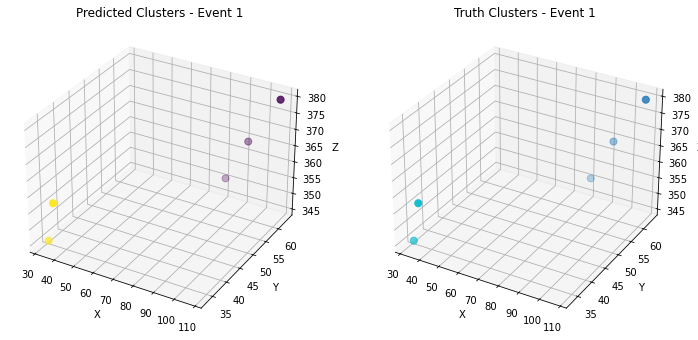

Processing Event 2/3530...


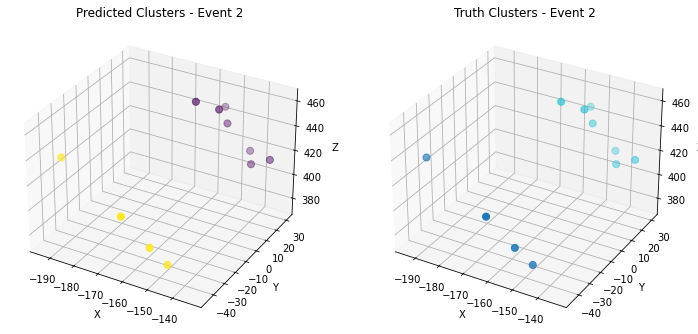

Processing Event 3/3530...


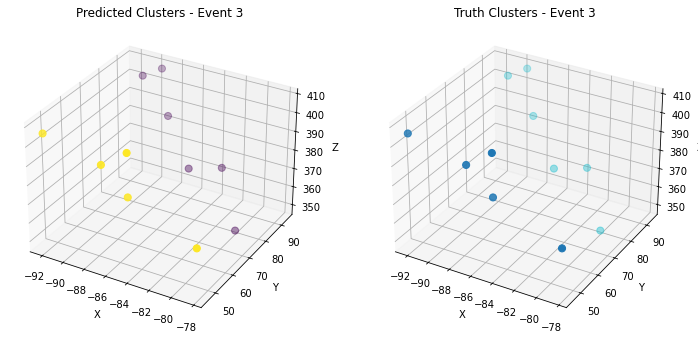

Processing Event 4/3530...


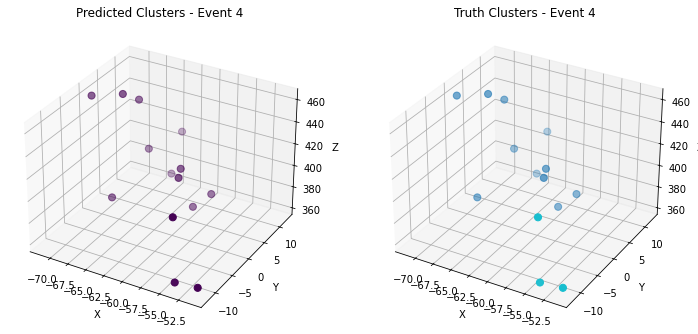

Processing Event 5/3530...


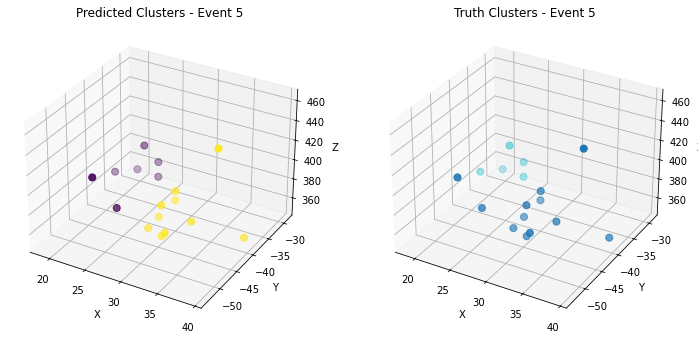

Processing Event 6/3530...


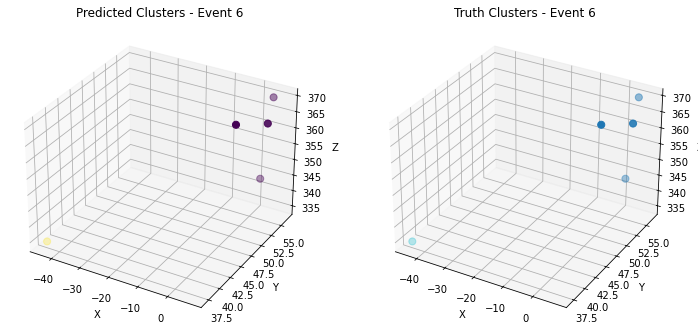

Processing Event 7/3530...


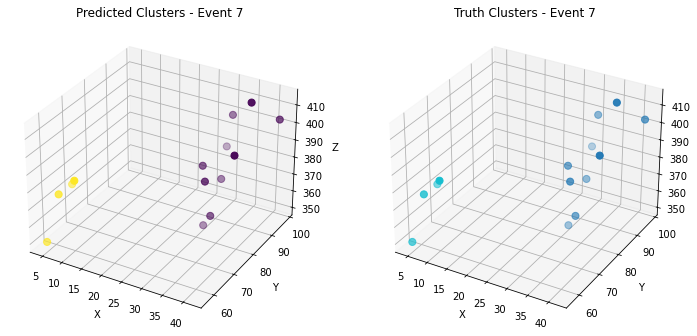

Processing Event 8/3530...


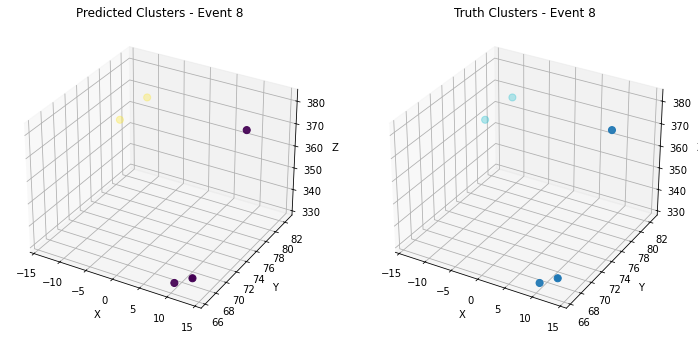

Processing Event 9/3530...


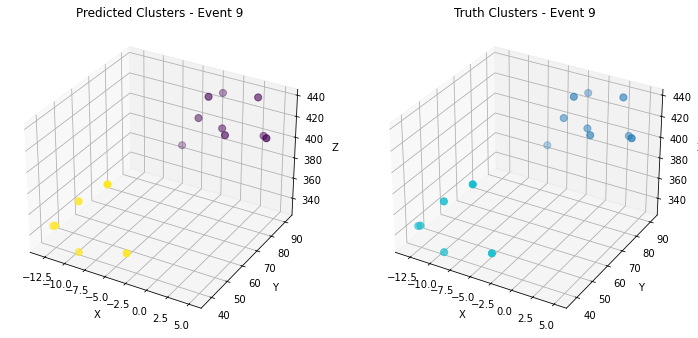

Processing Event 10/3530...


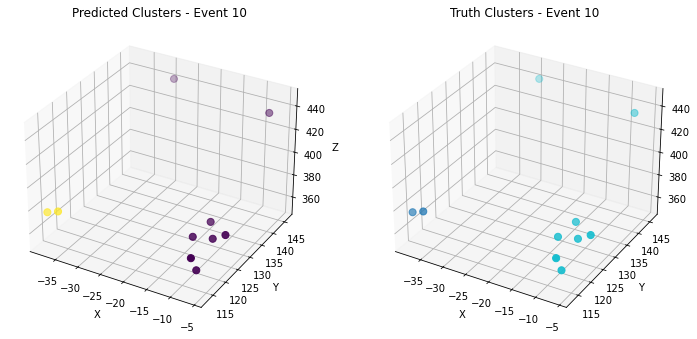

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Function to plot clusters
def plot_clusters(event_idx, xyz_coords, cluster_labels, truth_labels):
    fig = plt.figure(figsize=(12, 6))  # Set up the figure for side-by-side plots

    # Plot 1: Predicted clusters
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(xyz_coords[:, 0], xyz_coords[:, 1], xyz_coords[:, 2], c=cluster_labels, cmap='viridis', s=50)
    ax1.set_title(f"Predicted Clusters - Event {event_idx+1}")
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')

    # Plot 2: Truth clusters
    ax2 = fig.add_subplot(122, projection='3d')
    truth_colors = [label[0] for label in truth_labels]  # Use first entry of SimLabels as the cluster assignment
    ax2.scatter(xyz_coords[:, 0], xyz_coords[:, 1], xyz_coords[:, 2], c=truth_colors, cmap='tab10', s=50)
    ax2.set_title(f"Truth Clusters - Event {event_idx+1}")
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')

    plt.show()

# Loop over all events
for event_idx in range(10):
    print(f"Processing Event {event_idx+1}/{len(data_test)}...")

    # Extract data
    xyz_coords = data_test[event_idx].x[:, :3]  # Get x, y, z coordinates
    cluster_labels = all_cluster_labels[event_idx]  # Predicted cluster labels
    truth_labels = data_test[event_idx].assoc  # True SimLabels

    # Convert to numpy if not already
    xyz_coords = xyz_coords.cpu().numpy() if isinstance(xyz_coords, torch.Tensor) else xyz_coords
    cluster_labels = np.array(cluster_labels)
    truth_labels = np.array(truth_labels)

    # Plot for the current event
    plot_clusters(event_idx, xyz_coords, cluster_labels, truth_labels)


# Score Calculations

In [10]:
# Initialize recon_ind as an empty list
recon_ind = []

# Loop through each event
for event_idx, labels in enumerate(all_cluster_labels):
    event_clusters = {}  # Dictionary to store clusters for this event
    
    # Loop through each cluster label and corresponding track indices
    for cluster_idx, cluster_label in enumerate(labels):
        if cluster_label not in event_clusters:
            event_clusters[cluster_label] = []
        event_clusters[cluster_label].extend(Track_ind[event_idx][cluster_idx])
    
    # Append the clusters for this event as a list
    recon_ind.append([event_clusters[label] for label in sorted(event_clusters.keys())])


In [11]:
def calculate_sim_to_reco_score(CaloParticle, energies_indices, ReconstructedTrackster):
    """
    Calculate the sim-to-reco score for a given CaloParticle and ReconstructedTrackster.
    
    Parameters:
    - CaloParticle: array of DetIds in the CaloParticle.
    - energies_indices: array of energies associated with all DetIds (indexed by DetId).
    - ReconstructedTrackster: array of DetIds in the reconstructed Trackster.
    
    Returns:
    - sim_to_reco_score: the calculated sim-to-reco score.
    """
    numerator = 0.0
    denominator = 0.0

    # Calculate total energy of the CaloParticle
    total_energy_caloparticle = sum(energies_indices[det_id] for det_id in CaloParticle)
    if total_energy_caloparticle == 0:
        return 1.0  # No energy in the CaloParticle implies perfect mismatch

    # Calculate total energy of the ReconstructedTrackster
    total_energy_trackster = sum(energies_indices[det_id] for det_id in ReconstructedTrackster)

    # Iterate over all DetIds in the CaloParticle
    for det_id in CaloParticle:
        energy_k = energies_indices[det_id]  # Energy for the current DetId in CaloParticle

        # Fraction of energy in the Trackster (fr_k^TST)
        fr_tst_k = energies_indices[det_id] / total_energy_trackster if det_id in ReconstructedTrackster else 0.0

        # Fraction of energy in the CaloParticle (fr_k^SC)
        fr_sc_k = energies_indices[det_id] / total_energy_caloparticle

        # Update numerator using the min function
        numerator += min(
            (fr_tst_k - fr_sc_k) ** 2,  # First term in the min function
            fr_sc_k ** 2                # Second term in the min function
        ) * (energy_k ** 2)

        # Update denominator
        denominator += (fr_sc_k ** 2) * (energy_k ** 2)

    # Calculate score
    sim_to_reco_score = numerator / denominator if denominator != 0 else 1.0
    return sim_to_reco_score

def calculate_reco_to_sim_score(ReconstructedTrackster, energies_indices, CaloParticle):
    """
    Calculate the reco-to-sim score for a given ReconstructedTrackster and CaloParticle.

    Parameters:
    - ReconstructedTrackster: array of DetIds in the ReconstructedTrackster.
    - energies_indices: array of energies associated with all DetIds (indexed by DetId).
    - CaloParticle: array of DetIds in the CaloParticle.

    Returns:
    - reco_to_sim_score: the calculated reco-to-sim score.
    """
    numerator = 0.0
    denominator = 0.0

    # Calculate total energy of the ReconstructedTrackster
    total_energy_trackster = sum(energies_indices[det_id] for det_id in ReconstructedTrackster)
    if total_energy_trackster == 0:
        return 1.0  # No energy in the Trackster implies perfect mismatch

    # Calculate total energy of the CaloParticle
    total_energy_caloparticle = sum(energies_indices[det_id] for det_id in CaloParticle)

    # Iterate over all DetIds in the ReconstructedTrackster
    for det_id in ReconstructedTrackster:
        energy_k = energies_indices[det_id]  # Energy for the current DetId in the Trackster

        # Fraction of energy in the Trackster (fr_k^TST)
        fr_tst_k = energies_indices[det_id] / total_energy_trackster

        # Fraction of energy in the CaloParticle (fr_k^MC)
        fr_sc_k = energies_indices[det_id] / total_energy_caloparticle if det_id in CaloParticle else 0.0

        # Update numerator using the min function
        numerator += min(
            (fr_tst_k - fr_sc_k) ** 2,  # First term in the min function
            fr_tst_k ** 2               # Second term in the min function
        ) * (energy_k ** 2)

        # Update denominator
        denominator += (fr_tst_k ** 2) * (energy_k ** 2)

    # Calculate score
    reco_to_sim_score = numerator / denominator if denominator != 0 else 1.0
    return reco_to_sim_score



In [14]:
import pandas as pd
import numpy as np
from tqdm import tqdm


def calculate_all_event_scores(GT_ind, energies, recon_ind, LC_x, LC_y, LC_z, LC_eta):
    """
    Calculate sim-to-reco and reco-to-sim scores for all CaloParticle and ReconstructedTrackster combinations across all events.

    Parameters:
    - GT_ind: List of CaloParticle indices for all events.
    - energies: List of energy arrays for all events.
    - recon_ind: List of ReconstructedTrackster indices for all events.
    - LC_x, LC_y, LC_z, LC_eta: Lists of x, y, z positions and eta values for all DetIds across events.

    Returns:
    - DataFrame containing scores and additional features for each CaloParticle-Trackster combination across all events.
    """
    # Initialize an empty list to store results
    all_results = []

    # Loop over all events with a progress bar
    for event_index in tqdm(range(30), desc="Processing events"):
        caloparticles = GT_ind[event_index]  # Indices for all CaloParticles in the event
        tracksters = recon_ind[event_index]  # Indices for all ReconstructedTracksters in the event
        event_energies = energies[event_index]  # Energies for this event

        # Extract layer cluster positions and eta for this event
        event_x = np.array(LC_x[event_index])
        event_y = np.array(LC_y[event_index])
        event_z = np.array(LC_z[event_index])
        event_eta = np.array(LC_eta[event_index])

        # Compute barycenter for each CaloParticle
        cp_barycenters = []
        cp_avg_etas = []
        for caloparticle in caloparticles:
            # Compute barycenter (x, y, z)
            barycenter_x = np.mean([event_x[det_id] for det_id in caloparticle])
            barycenter_y = np.mean([event_y[det_id] for det_id in caloparticle])
            barycenter_z = np.mean([event_z[det_id] for det_id in caloparticle])
            cp_barycenters.append(np.array([barycenter_x, barycenter_y, barycenter_z]))
            
            # Compute average eta
            avg_eta = np.mean([event_eta[det_id] for det_id in caloparticle])
            cp_avg_etas.append(avg_eta)

        # Compute separation between two CaloParticles if at least two exist
        if len(cp_barycenters) >= 2:
            cp_separation = np.linalg.norm(cp_barycenters[0] - cp_barycenters[1])
        else:
            cp_separation = 0.0

        # Loop over all CaloParticles
        for calo_idx, caloparticle in enumerate(caloparticles):
            # Loop over all Tracksters
            for trackster_idx, trackster in enumerate(tracksters):
                # Calculate sim-to-reco score
                sim_to_reco_score = calculate_sim_to_reco_score(caloparticle, event_energies, trackster)
                # Calculate reco-to-sim score
                reco_to_sim_score = calculate_reco_to_sim_score(trackster, event_energies, caloparticle)

                # Calculate total energy for CaloParticle and Trackster
                cp_energy = np.sum([event_energies[det_id] for det_id in caloparticle])
                trackster_energy = np.sum([event_energies[det_id] for det_id in trackster])

                # Calculate energy difference ratio
                energy_diff_ratio = (trackster_energy - cp_energy) / cp_energy if cp_energy != 0 else None

                # Append results
                all_results.append({
                    "event_index": event_index,
                    "cp_id": calo_idx,
                    "trackster_id": trackster_idx,
                    "sim_to_reco_score": sim_to_reco_score,
                    "reco_to_sim_score": reco_to_sim_score,
                    "cp_energy": cp_energy,
                    "trackster_energy": trackster_energy,
                    "cp_avg_eta": cp_avg_etas[calo_idx],
                    "cp_separation": cp_separation,
                    "energy_diff_ratio": energy_diff_ratio
                })

    # Convert results to a DataFrame
    df = pd.DataFrame(all_results)
    return df


In [15]:

df_scores = calculate_all_event_scores(GT_ind, energies, recon_ind, LC_x, LC_y, LC_z, LC_eta)
df_CERN = calculate_all_event_scores(GT_ind, energies, MT_ind, LC_x, LC_y, LC_z, LC_eta)

Processing events: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:08<00:00,  3.54it/s]


In [16]:
# Assuming 'df' is your dataframe
max_sim_to_reco_score = df_scores['sim_to_reco_score'].max()
max_reco_to_sim_score = df_scores['reco_to_sim_score'].max()

print("Maximum sim-to-reco score:", max_sim_to_reco_score)
print("Maximum reco-to-sim score:", max_reco_to_sim_score)

Maximum sim-to-reco score: 1.0
Maximum reco-to-sim score: 1.0


# Purity + Efficiency

In [17]:
import pandas as pd

# Ensure 'cp_id' and 'trackster_id' are numeric for both dataframes
df_scores['cp_id'] = pd.to_numeric(df_scores['cp_id'], errors='coerce')
df_scores['trackster_id'] = pd.to_numeric(df_scores['trackster_id'], errors='coerce')

df_CERN['cp_id'] = pd.to_numeric(df_CERN['cp_id'], errors='coerce')
df_CERN['trackster_id'] = pd.to_numeric(df_CERN['trackster_id'], errors='coerce')

# Define a function to calculate efficiency and purity
def calculate_efficiency_purity(df, model_name):
    # ----- Efficiency Calculation -----
    cp_valid = df.dropna(subset=['cp_id']).copy()
    cp_grouped = cp_valid.groupby(['event_index', 'cp_id'])
    cp_associated = cp_grouped['sim_to_reco_score'].min() < 0.2
    num_associated_cp = cp_associated.sum()
    total_cp = cp_associated.count()
    efficiency = num_associated_cp / total_cp if total_cp > 0 else 0

    # ----- Purity Calculation -----
    tst_valid = df.dropna(subset=['trackster_id']).copy()
    tst_grouped = tst_valid.groupby(['event_index', 'trackster_id'])
    tst_associated = tst_grouped['reco_to_sim_score'].min() < 0.2
    num_associated_tst = tst_associated.sum()
    total_tst = tst_associated.count()
    purity = num_associated_tst / total_tst if total_tst > 0 else 0

    # Print results for the model
    print(f"\nModel: {model_name}")
    print(f"Efficiency: {efficiency:.4f} ({num_associated_cp} associated CPs out of {total_cp} total CPs)")
    print(f"Purity: {purity:.4f} ({num_associated_tst} associated Tracksters out of {total_tst} total Tracksters)")
    return cp_valid, tst_valid
# Calculate for both models
cp_valid, tst_valid = calculate_efficiency_purity(df_scores, "Your Model")

calculate_efficiency_purity(df_CERN, "CERN Model")



Model: Your Model
Efficiency: 0.3667 (22 associated CPs out of 60 total CPs)
Purity: 0.6842 (39 associated Tracksters out of 57 total Tracksters)

Model: CERN Model
Efficiency: 0.3621 (21 associated CPs out of 58 total CPs)
Purity: 0.3645 (39 associated Tracksters out of 107 total Tracksters)


(     event_index  cp_id  trackster_id  sim_to_reco_score  reco_to_sim_score  \
 0              0      0             0           1.000000           1.000000   
 1              0      0             1           1.000000           1.000000   
 2              0      0             2           0.129414           0.069215   
 3              0      1             0           0.366915           0.136147   
 4              0      1             1           1.000000           0.910581   
 ..           ...    ...           ...                ...                ...   
 209           29      0             3           1.000000           1.000000   
 210           29      1             0           1.000000           1.000000   
 211           29      1             1           0.086205           0.050399   
 212           29      1             2           1.000000           0.930695   
 213           29      1             3           1.000000           0.967553   
 
      cp_energy  trackster_energy  cp_

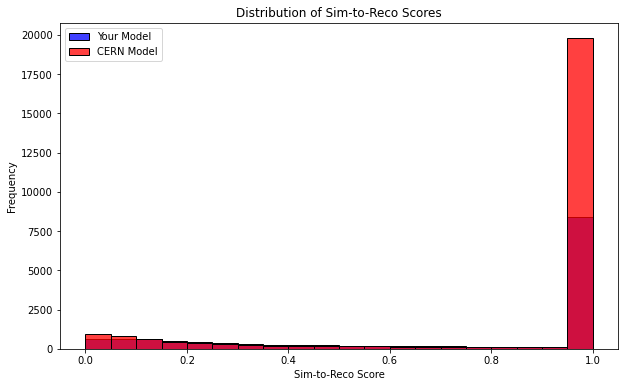

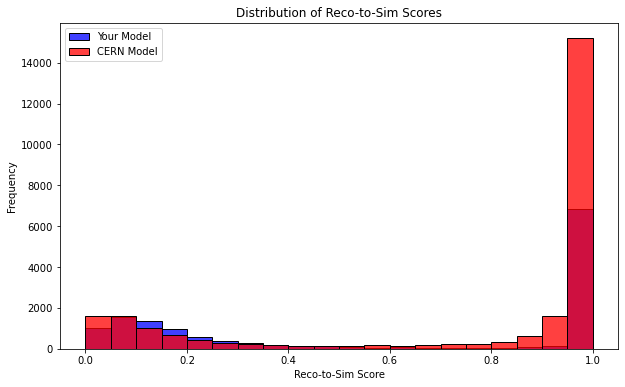

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# ----- Plotting Sim-to-Reco Score Distribution -----
plt.figure(figsize=(10, 6))
sns.histplot(df_scores['sim_to_reco_score'], bins=20, label='Your Model', color='blue')
sns.histplot(df_CERN['sim_to_reco_score'], bins=20, label='CERN Model', color='red')
plt.title('Distribution of Sim-to-Reco Scores')
plt.xlabel('Sim-to-Reco Score')
plt.ylabel('Frequency')

plt.legend()
plt.show()

# ----- Plotting Reco-to-Sim Score Distribution -----
plt.figure(figsize=(10, 6))
sns.histplot(df_scores['reco_to_sim_score'], bins=20, label='Your Model', color='blue')
sns.histplot(df_CERN['reco_to_sim_score'], bins=20, label='CERN Model', color='red')
plt.title('Distribution of Reco-to-Sim Scores')
plt.xlabel('Reco-to-Sim Score')
plt.ylabel('Frequency')

plt.legend()
plt.show()


In [8]:
# Assuming 'df' is your dataframe
max_sim_to_reco_score = df_CERN['sim_to_reco_score'].max()
max_reco_to_sim_score = df_CERN['reco_to_sim_score'].max()

print("Maximum sim-to-reco score:", max_sim_to_reco_score)
print("Maximum reco-to-sim score:", max_reco_to_sim_score)

Maximum sim-to-reco score: 1.0
Maximum reco-to-sim score: 1.0


# Plot vs params

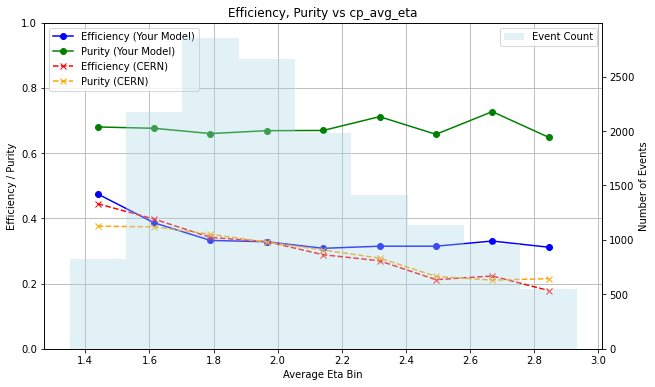

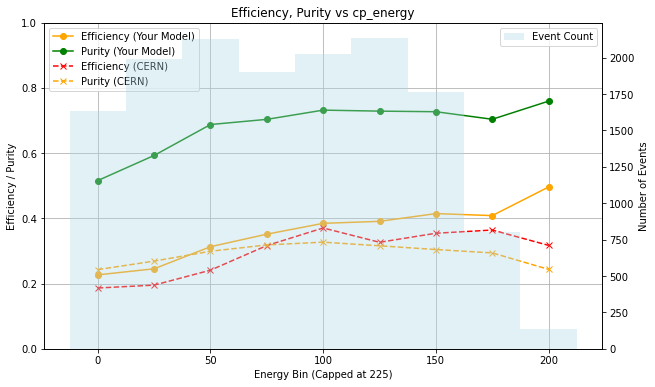

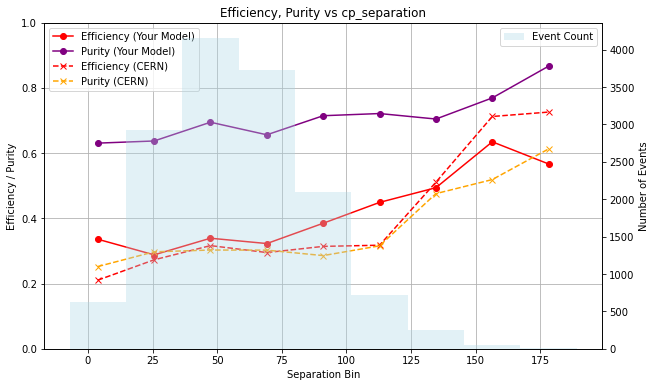

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ---- Preprocessing ----
df_scores['cp_id'] = pd.to_numeric(df_scores['cp_id'], errors='coerce')
df_scores['trackster_id'] = pd.to_numeric(df_scores['trackster_id'], errors='coerce')

df_CERN['cp_id'] = pd.to_numeric(df_CERN['cp_id'], errors='coerce')
df_CERN['trackster_id'] = pd.to_numeric(df_CERN['trackster_id'], errors='coerce')

# Map Required Columns from df_scores to df_CERN
event_mapping = df_scores[['event_index', 'cp_avg_eta', 'cp_energy', 'cp_separation']].drop_duplicates('event_index')
df_CERN = pd.merge(df_CERN, event_mapping, on='event_index', how='left')

# ---- Efficiency and Purity Calculation ----
def calculate_efficiency_purity(df):
    # Efficiency
    cp_valid = df.dropna(subset=['cp_id']).copy()
    cp_grouped = cp_valid.groupby(['event_index', 'cp_id'])
    cp_associated = cp_grouped['sim_to_reco_score'].min() < 0.2
    cp_efficiency = cp_associated.groupby(level=0).mean().reset_index(name='efficiency')
    cp_valid = cp_valid.merge(cp_efficiency, on='event_index', how='left')

    # Purity
    tst_valid = df.dropna(subset=['trackster_id']).copy()
    tst_grouped = tst_valid.groupby(['event_index', 'trackster_id'])
    tst_associated = tst_grouped['reco_to_sim_score'].min() < 0.2
    tst_purity = tst_associated.groupby(level=0).mean().reset_index(name='purity')
    tst_valid = tst_valid.merge(tst_purity, on='event_index', how='left')

    # Merge into a single DataFrame
    df_plot = pd.merge(cp_valid[['event_index', 'cp_avg_eta', 'cp_energy', 'cp_separation', 'efficiency']],
                       tst_valid[['event_index', 'purity']],
                       on='event_index',
                       how='inner')
    return df_plot

df_plot = calculate_efficiency_purity(df_scores)
df_plot_CERN = calculate_efficiency_purity(df_CERN)

# ---- Binning ----
eta_bins = np.linspace(df_plot['cp_avg_eta'].min(), df_plot['cp_avg_eta'].max(), 10)
energy_bins = np.linspace(df_plot['cp_energy'].min(), 225, 10)  # Capped at 225
separation_bins = np.linspace(df_plot['cp_separation'].min(), df_plot['cp_separation'].max(), 10)

df_plot['eta_bin'] = pd.cut(df_plot['cp_avg_eta'], bins=eta_bins, labels=False, include_lowest=True)
df_plot['energy_bin'] = pd.cut(df_plot['cp_energy'], bins=energy_bins, labels=False, include_lowest=True)
df_plot['separation_bin'] = pd.cut(df_plot['cp_separation'], bins=separation_bins, labels=False, include_lowest=True)

df_plot_CERN['eta_bin'] = pd.cut(df_plot_CERN['cp_avg_eta'], bins=eta_bins, labels=False, include_lowest=True)
df_plot_CERN['energy_bin'] = pd.cut(df_plot_CERN['cp_energy'], bins=energy_bins, labels=False, include_lowest=True)
df_plot_CERN['separation_bin'] = pd.cut(df_plot_CERN['cp_separation'], bins=separation_bins, labels=False, include_lowest=True)

def calculate_bin_error(numerator, denominator):
    if denominator > 0:
        efficiency = numerator / denominator
        error = np.sqrt(efficiency * (1 - efficiency) / denominator)
    else:
        efficiency = 0.0
        error = 0.0
    return efficiency, error

def aggregate_bins(data, bin_col):
    return data.groupby(bin_col).apply(lambda g: pd.Series({
        'efficiency_mean': g['efficiency'].mean(),
        'efficiency_error': calculate_bin_error(g['efficiency'].sum(), len(g))[1],
        'purity_mean': g['purity'].mean(),
        'purity_error': calculate_bin_error(g['purity'].sum(), len(g))[1],
        'count': len(g) // 4
    })).reset_index()

# Aggregate Data
eta_group = aggregate_bins(df_plot, 'eta_bin').set_index('eta_bin').reindex(range(len(eta_bins) - 1)).reset_index()
energy_group = aggregate_bins(df_plot, 'energy_bin').set_index('energy_bin').reindex(range(len(energy_bins) - 1)).reset_index()
separation_group = aggregate_bins(df_plot, 'separation_bin').set_index('separation_bin').reindex(range(len(separation_bins) - 1)).reset_index()

eta_group_CERN = aggregate_bins(df_plot_CERN, 'eta_bin').set_index('eta_bin').reindex(range(len(eta_bins) - 1)).reset_index()
energy_group_CERN = aggregate_bins(df_plot_CERN, 'energy_bin').set_index('energy_bin').reindex(range(len(energy_bins) - 1)).reset_index()
separation_group_CERN = aggregate_bins(df_plot_CERN, 'separation_bin').set_index('separation_bin').reindex(range(len(separation_bins) - 1)).reset_index()

# Fill Missing Values
for group in [eta_group_CERN, energy_group_CERN, separation_group_CERN]:
    group.fillna({'efficiency_mean': np.nan, 'efficiency_error': np.nan,
                  'purity_mean': np.nan, 'purity_error': np.nan, 'count': 0}, inplace=True)

# ---- Plotting ----
def plot_metric(x_bins, group, group_CERN, xlabel, ylabel, title, efficiency_color, purity_color):
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()

    # Your Model
    ax1.plot(x_bins, group['efficiency_mean'], marker='o', linestyle='-', color=efficiency_color, label='Efficiency (Your Model)')
    ax1.plot(x_bins, group['purity_mean'], marker='o', linestyle='-', color=purity_color, label='Purity (Your Model)')

    # CERN Model
    ax1.plot(x_bins, group_CERN['efficiency_mean'], marker='x', linestyle='--', color='red', label='Efficiency (CERN)')
    ax1.plot(x_bins, group_CERN['purity_mean'], marker='x', linestyle='--', color='orange', label='Purity (CERN)')

    ax1.set_ylim(0, 1)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    ax1.legend(loc='upper left')
    ax1.grid()

    ax2.bar(x_bins, group['count'], width=(x_bins[1] - x_bins[0]), color='lightblue', alpha=0.35, label='Event Count')
    ax2.set_ylabel('Number of Events')
    ax2.legend(loc='upper right')

    plt.title(title)
    plt.show()

# Plot Each Metric
plot_metric(eta_bins[:-1], eta_group, eta_group_CERN, 'Average Eta Bin', 'Efficiency / Purity', 'Efficiency, Purity vs cp_avg_eta', 'blue', 'green')
plot_metric(energy_bins[:-1], energy_group, energy_group_CERN, 'Energy Bin (Capped at 225)', 'Efficiency / Purity', 'Efficiency, Purity vs cp_energy', 'orange', 'green')
plot_metric(separation_bins[:-1], separation_group, separation_group_CERN, 'Separation Bin', 'Efficiency / Purity', 'Efficiency, Purity vs cp_separation', 'red', 'purple')


# Plotting Sigma

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_energy_diff_vs_separation(df_scores):
    """
    Plot energy difference ratio metrics (mean and sigma) against CaloParticle separation.

    Parameters:
    - df_scores: DataFrame containing the calculated scores and features for events.

    Returns:
    - None (plots are displayed).
    """
    # Filter to include only associated events (reco-to-sim score < 0.2)
    associated_scores = df_scores[df_scores['reco_to_sim_score'] < 0.2]

    # Define bins for cp_separation
    separation_bins = np.linspace(associated_scores['cp_separation'].min(), associated_scores['cp_separation'].max(), 10)
    associated_scores['separation_bin'] = pd.cut(
        associated_scores['cp_separation'], bins=separation_bins, labels=False, include_lowest=True
    )

    # Initialize lists to store results
    separation_bin_centers = []
    sigma_values = []
    mean_values = []
    event_counts = []

    # Loop through each separation bin
    for bin_idx in range(len(separation_bins) - 1):
        # Select data for the current bin
        bin_data = associated_scores[associated_scores['separation_bin'] == bin_idx]['energy_diff_ratio']
        
        # Skip if no data in this bin
        if bin_data.empty:
            continue
        
        # Fit a Gaussian to the data
        mu, sigma = norm.fit(bin_data)
        
        # Store results
        bin_center = (separation_bins[bin_idx] + separation_bins[bin_idx + 1]) / 2
        separation_bin_centers.append(bin_center)
        sigma_values.append(sigma)
        mean_values.append(mu)
        event_counts.append(len(bin_data))

        # Plot example histograms for the first and middle bins
        if bin_idx == 0 or bin_idx == len(separation_bins) // 2:
            plt.figure(figsize=(8, 6))
            plt.hist(bin_data, bins=30, density=True, alpha=0.6, color='blue', label='Histogram')
            xmin, xmax = plt.xlim()
            x = np.linspace(xmin, xmax, 100)
            p = norm.pdf(x, mu, sigma)
            plt.plot(x, p, 'orange', label=f'Fit: μ={mu:.3f}, σ={sigma:.3f}')
            plt.title(f'Energy Difference Ratio (Separation Bin {bin_idx})\nμ={mu:.3f}, σ={sigma:.3f}, Events={len(bin_data)}')
            plt.xlabel('(Reconstructed Energy - True Energy) / True Energy')
            plt.ylabel('Density')
            plt.legend()
            plt.grid()
            plt.show()

    # Plot σ (sigma) vs Separation
    plt.figure(figsize=(10, 6))
    plt.plot(separation_bin_centers, sigma_values, 'o-', label='Sigma (σ)', color='blue')
    plt.xlabel('Separation')
    plt.ylabel('Sigma (σ)')
    plt.title('Sigma vs Separation')
    plt.grid()
    plt.legend()
    plt.show()

    # Plot μ (mean) vs Separation
    plt.figure(figsize=(10, 6))
    plt.plot(separation_bin_centers, mean_values, 'o-', label='Mean (μ)', color='green')
    plt.xlabel('Separation')
    plt.ylabel('Mean (μ)')
    plt.title('Mean vs Separation')
    plt.grid()
    plt.legend()
    plt.show()




/tmp/ipykernel_1503488/3855021492.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  associated_scores['separation_bin'] = pd.cut(associated_scores['cp_separation'], bins=separation_bins, labels=False, include_lowest=True)


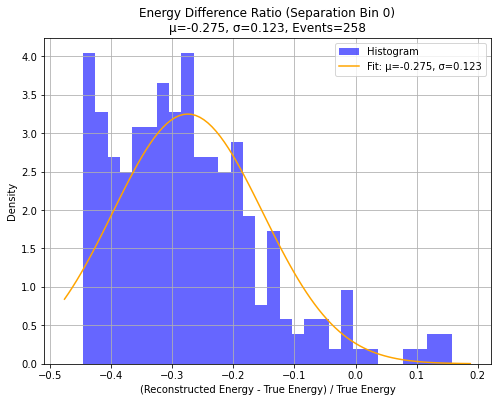

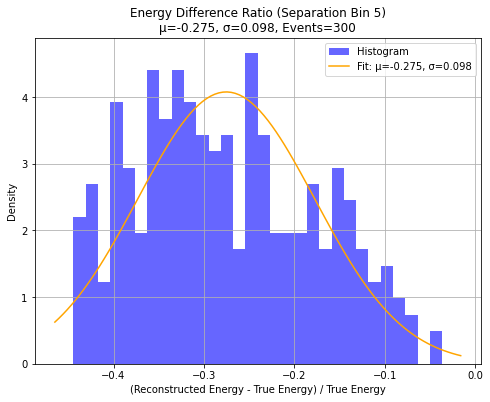

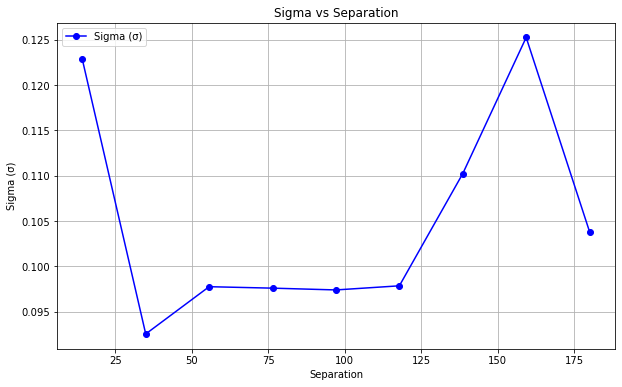

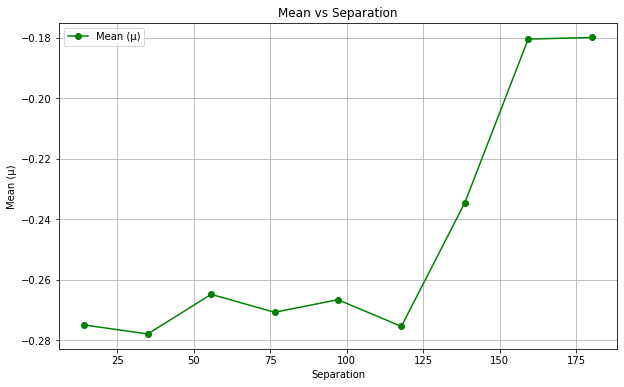

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Filter to include only associated events (reco-to-sim score < 0.2)
associated_scores = df_CERN[df_CERN['reco_to_sim_score'] < 0.2]

# Define bins for cp_separation
separation_bins = np.linspace(associated_scores['cp_separation'].min(), associated_scores['cp_separation'].max(), 10)
associated_scores['separation_bin'] = pd.cut(associated_scores['cp_separation'], bins=separation_bins, labels=False, include_lowest=True)

# Initialize lists to store results
separation_bin_centers = []
sigma_values = []
mean_values = []
event_counts = []

# Loop through each separation bin
for bin_idx in range(len(separation_bins) - 1):
    # Select data for the current bin
    bin_data = associated_scores[associated_scores['separation_bin'] == bin_idx]['energy_diff_ratio']
    
    # Skip if no data in this bin
    if bin_data.empty:
        continue
    
    # Fit a Gaussian to the data
    mu, sigma = norm.fit(bin_data)
    
    # Store results
    bin_center = (separation_bins[bin_idx] + separation_bins[bin_idx + 1]) / 2
    separation_bin_centers.append(bin_center)
    sigma_values.append(sigma)
    mean_values.append(mu)
    event_counts.append(len(bin_data))

    # Plot a couple of example histograms for reference
    if bin_idx == 0 or bin_idx == len(separation_bins) // 2:  # Example: First and middle bins
        plt.figure(figsize=(8, 6))
        plt.hist(bin_data, bins=30, density=True, alpha=0.6, color='blue', label='Histogram')
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, sigma)
        plt.plot(x, p, 'orange', label=f'Fit: μ={mu:.3f}, σ={sigma:.3f}')
        plt.title(f'Energy Difference Ratio (Separation Bin {bin_idx})\nμ={mu:.3f}, σ={sigma:.3f}, Events={len(bin_data)}')
        plt.xlabel('(Reconstructed Energy - True Energy) / True Energy')
        plt.ylabel('Density')
        plt.legend()
        plt.grid()
        plt.show()

# Plot σ (sigma) vs Separation
plt.figure(figsize=(10, 6))
plt.plot(separation_bin_centers, sigma_values, 'o-', label='Sigma (σ)', color='blue')
plt.xlabel('Separation')
plt.ylabel('Sigma (σ)')
plt.title('Sigma vs Separation')
plt.grid()
plt.legend()
plt.show()

# Plot μ (mean) vs Separation
plt.figure(figsize=(10, 6))
plt.plot(separation_bin_centers, mean_values, 'o-', label='Mean (μ)', color='green')
plt.xlabel('Separation')
plt.ylabel('Mean (μ)')
plt.title('Mean vs Separation')
plt.grid()
plt.legend()
plt.show()


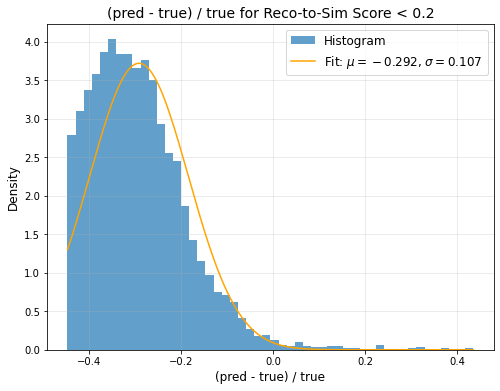

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_scores is your DataFrame with all the relevant data
# Filter the DataFrame for reco-to-sim scores < 0.2
filtered_df = df_scores[df_scores['reco_to_sim_score'] < 0.2]

# Calculate the (pred - true) / true for energy_diff_ratio (or adjust the column name as needed)
# Assuming 'energy_diff_ratio' is the column of interest for (pred - true) / true
values = filtered_df['energy_diff_ratio']

# Plot the histogram
plt.figure(figsize=(8, 6))
counts, bins, patches = plt.hist(values, bins=50, density=True, alpha=0.7, label='Histogram')

# Fit a Gaussian distribution to the data
mu, sigma = np.mean(values), np.std(values)
x = np.linspace(bins[0], bins[-1], 1000)
pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)
plt.plot(x, pdf, label=f'Fit: $\mu={mu:.3f}$, $\sigma={sigma:.3f}$', color='orange')

# Add labels and title
plt.title('(pred - true) / true for Reco-to-Sim Score < 0.2', fontsize=14)
plt.xlabel('(pred - true) / true', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Save or show the plot
plt.show()


/tmp/ipykernel_1503488/776054542.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reconstructed_df['energy_bin'] = pd.cut(reconstructed_df['trackster_energy'], bins=energy_bins)


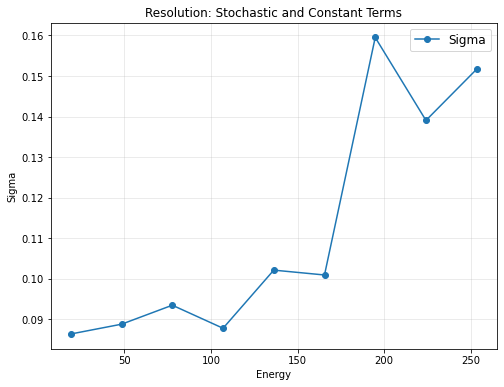

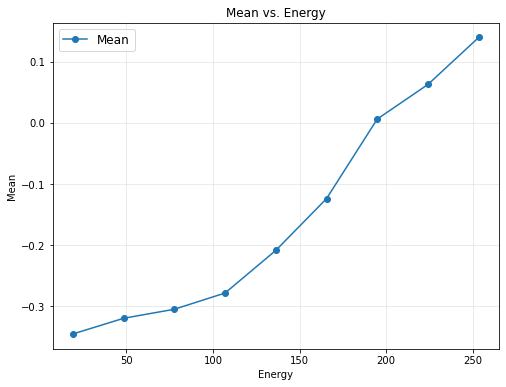

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Assuming df_scores is your DataFrame with all the relevant data
# Filter the DataFrame for tracksters that have been reconstructed (reco_to_sim_score < 0.2)
reconstructed_df = df_scores[df_scores['reco_to_sim_score'] < 0.2]

# Group the data into energy bins
energy_bins = np.linspace(reconstructed_df['trackster_energy'].min(), reconstructed_df['trackster_energy'].max(), 10)
reconstructed_df['energy_bin'] = pd.cut(reconstructed_df['trackster_energy'], bins=energy_bins)

# Initialize lists to store results
bin_centers = []
sigmas = []
means = []

# Loop over each bin
for energy_bin, group in reconstructed_df.groupby('energy_bin'):
    if group.empty:
        continue

    # Calculate the bin center
    bin_center = (energy_bin.left + energy_bin.right) / 2
    bin_centers.append(bin_center)

    # Fit a Gaussian to the (pred - true) / true values
    values = group['energy_diff_ratio']
    mu, sigma = norm.fit(values)

    # Store the mean and sigma
    means.append(mu)
    sigmas.append(sigma)

# Plot sigma vs. energy
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, sigmas, 'o-', label='Sigma')
plt.title('Resolution: Stochastic and Constant Terms')
plt.xlabel('Energy')
plt.ylabel('Sigma')
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

# Plot mean vs. energy
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, means, 'o-', label='Mean')
plt.title('Mean vs. Energy')
plt.xlabel('Energy')
plt.ylabel('Mean')
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()


# Test


In [27]:
print(df_CERN[df_CERN['event_index'] == 3])

    event_index  cp_id  trackster_id  sim_to_reco_score  reco_to_sim_score  \
22            3      0             0           1.000000           1.000000   
23            3      0             1           0.614183           0.191469   
24            3      0             2           1.000000           0.884138   
25            3      0             3           1.000000           0.972718   
26            3      1             0           1.000000           0.660607   
27            3      1             1           0.979171           1.000000   
28            3      1             2           1.000000           0.999998   
29            3      1             3           1.000000           1.000000   

     cp_energy  trackster_energy  cp_avg_eta  cp_separation  energy_diff_ratio  
22  121.508577          3.614473    2.580636      43.345654          -0.970253  
23  121.508577         68.339877    2.580636      43.345654          -0.437572  
24  121.508577          7.255732    2.580636      43.3

In [19]:
CLUE_RtS = data_file['associations;1']['Mergetracksters_recoToSim_CP_score'].array()
CLUE_StR = data_file['associations;1']['Mergetracksters_simToReco_CP_score'].array()

In [26]:
print(CLUE_RtS[3])

[[0, 1], [3.21e-05, 1], [0.00112, 0.998], [0.00155, 1]]
